In [1]:
# 1. Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
pd.set_option("display.max_columns", None)


In [2]:
# 2. Load data
path = "sensor_maintenance_data.csv"  # adjust if needed
df = pd.read_csv(path)

# Parse dates
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["Last Maintenance Date"] = pd.to_datetime(df["Last Maintenance Date"])

# Sort
df = df.sort_values(["Equipment_ID", "Timestamp"]).reset_index(drop=True)

df.head()


,Sensor_ID,Timestamp,Voltage (V),Current (A),Temperature (°C),Power (W),Humidity (%),Vibration (m/s²),Equipment_ID,Operational Status,Fault Status,Failure Type,Last Maintenance Date,Maintenance Type,Failure History,Repair Time (hrs),Maintenance Costs (USD),Ambient Temperature (°C),Ambient Humidity (%),External Factors,X,Y,Z,Equipment Relationship,Equipment Criticality,Fault Detected,Predictive Maintenance Trigger
0,S_1,2024-01-01 00:00:00,110,0.5,20,55.0,40,0.2,E_1,Operational,Fault Detected,Overload,2024-12-01,Preventive,Fault Detected,5,150,20,40,Clear Weather,0,0,0,Independent,High,1,1
1,S_51,2024-01-03 02:00:00,110,0.5,20,55.0,40,0.2,E_1,Operational,No Fault,Overheating,2024-12-01,Preventive,No Fault,0,150,20,40,Clear Weather,50,0,20,Dependent,High,0,0
2,S_101,2024-01-05 04:00:00,110,0.5,20,55.0,40,0.2,E_1,Operational,No Fault,Overload,2024-12-01,Preventive,No Fault,0,150,20,40,Clear Weather,0,0,10,Dependent,High,0,1
3,S_151,2024-01-07 06:00:00,110,0.5,20,55.0,40,0.2,E_1,Operational,Fault Detected,Overheating,2024-12-01,Preventive,Fault Detected,5,150,20,40,Clear Weather,50,0,0,Independent,High,1,0
4,S_201,2024-01-09 08:00:00,110,0.5,20,55.0,40,0.2,E_1,Operational,No Fault,Overload,2024-12-01,Preventive,No Fault,0,150,20,40,Clear Weather,0,0,20,Dependent,High,0,1


In [3]:
# 3. Quick overview & data dictionary helper
print(df.shape)
df.info()

# Value counts for key categoricals
cat_cols = [
    "Operational Status",
    "Fault Status",
    "Failure Type",
    "Maintenance Type",
    "Equipment Relationship",
    "Equipment Criticality",
]

for c in cat_cols:
    print(f"\n=== {c} ===")
    print(df[c].value_counts(dropna=False))


(500, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Sensor_ID                       500 non-null    object        
 1   Timestamp                       500 non-null    datetime64[ns]
 2   Voltage (V)                     500 non-null    int64         
 3   Current (A)                     500 non-null    float64       
 4   Temperature (°C)                500 non-null    int64         
 5   Power (W)                       500 non-null    float64       
 6   Humidity (%)                    500 non-null    int64         
 7   Vibration (m/s²)                500 non-null    float64       
 8   Equipment_ID                    500 non-null    object        
 9   Operational Status              500 non-null    object        
 10  Fault Status                    500 non-null    object        
 

In [4]:
# 4. Missingness & basic stats
# Missingness
missing = df.isna().mean().sort_values(ascending=False)
missing[missing > 0]  # see only columns with missing

# Basic stats for numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Voltage (V),500.0,114.500,2.875158,110.0,112.00,114.50,117.00,119.0
Current (A),500.0,0.700,0.141563,0.5,0.60,0.70,0.80,0.9
Temperature (°C),500.0,24.500,2.875158,20.0,22.00,24.50,27.00,29.0
Power (W),500.0,80.350,17.293311,55.0,66.60,80.15,94.40,107.1
Humidity (%),500.0,44.500,2.875158,40.0,42.00,44.50,47.00,49.0
Vibration (m/s²),500.0,0.300,0.070781,0.2,0.25,0.30,0.35,0.4
Repair Time (hrs),500.0,2.336,3.402095,0.0,0.00,0.00,6.00,9.0
Maintenance Costs (USD),500.0,195.000,28.751579,150.0,170.00,195.00,220.00,240.0
Ambient Temperature (°C),500.0,22.000,1.415630,20.0,21.00,22.00,23.00,24.0
Ambient Humidity (%),500.0,42.000,1.415630,40.0,41.00,42.00,43.00,44.0


In [5]:
# 5. Sampling interval check per equipment (hourly assumption)
# Compute time diff in hours between consecutive points per equipment
df = df.sort_values(["Equipment_ID", "Timestamp"])
df["time_diff_hr"] = (
    df.groupby("Equipment_ID")["Timestamp"].diff().dt.total_seconds() / 3600.0
)

df["time_diff_hr"].describe()

# Look at non-1-hour intervals if any
df.loc[df["time_diff_hr"].notna() & (df["time_diff_hr"] != 1), 
       ["Equipment_ID", "Timestamp", "time_diff_hr"]].head()


,Equipment_ID,Timestamp,time_diff_hr
1,E_1,2024-01-03 02:00:00,50.0
2,E_1,2024-01-05 04:00:00,50.0
3,E_1,2024-01-07 06:00:00,50.0
4,E_1,2024-01-09 08:00:00,50.0
5,E_1,2024-01-11 10:00:00,50.0


In [6]:
# 6. Label consistency checks
# Ensure these are numeric 0/1 (if they aren't already, cast)
label_cols = ["Fault Detected", "Predictive Maintenance Trigger"]
for c in label_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# Crosstabs
pd.crosstab(df["Fault Detected"], df["Fault Status"])
pd.crosstab(df["Fault Detected"], df["Failure Type"])
pd.crosstab(df["Fault Detected"], df["Predictive Maintenance Trigger"])


Predictive Maintenance Trigger,0,1
Fault Detected,,
0,250,83
1,125,42


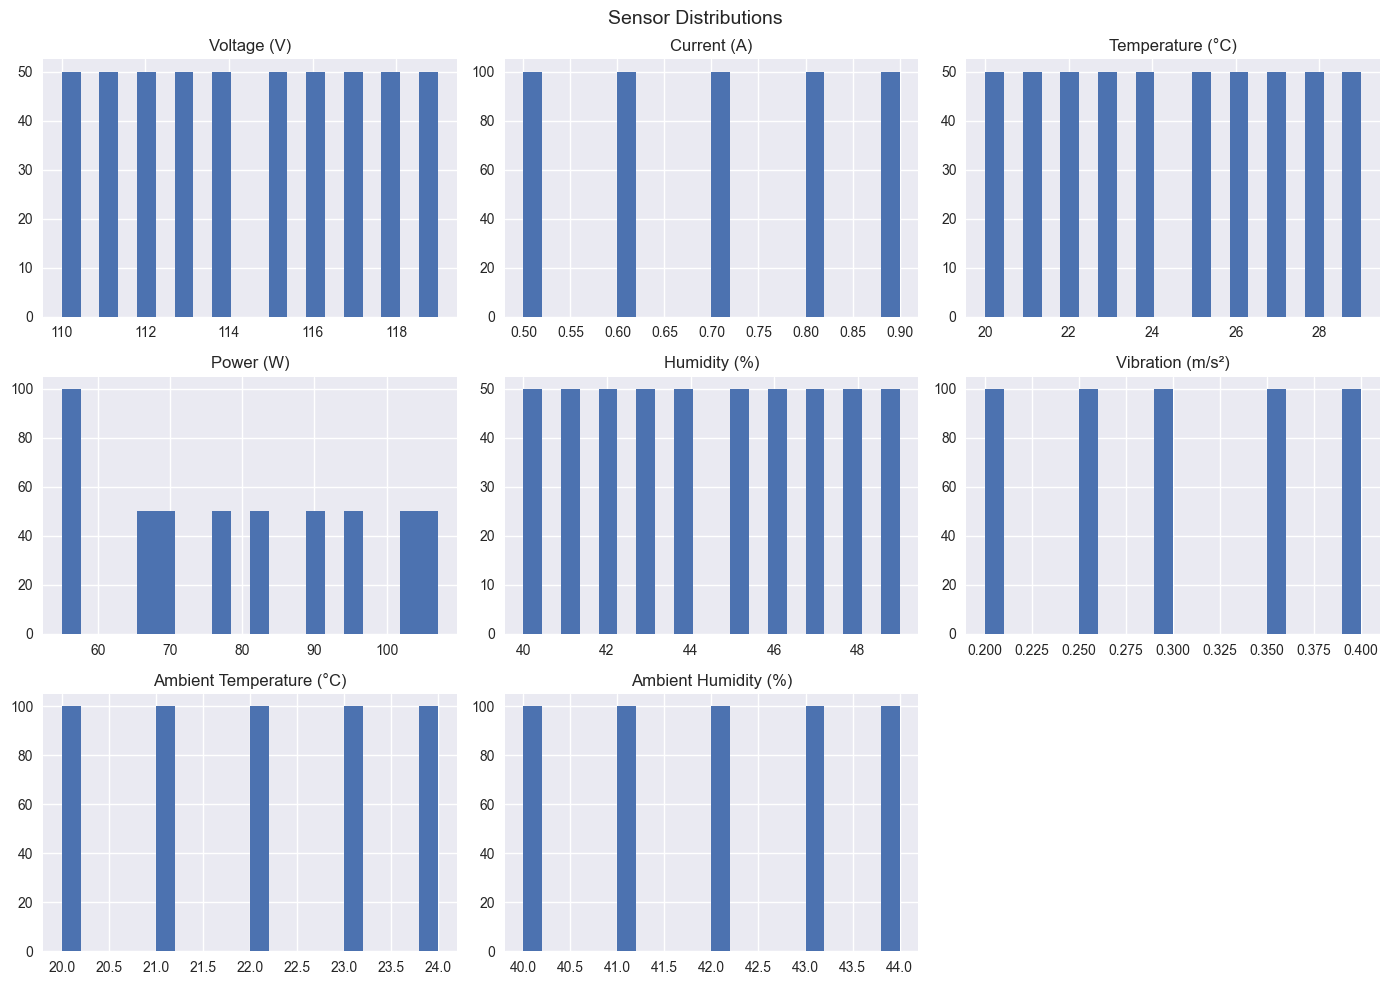

In [7]:
# 7. Sensor distributions
sensor_cols = [
    "Voltage (V)",
    "Current (A)",
    "Temperature (°C)",
    "Power (W)",
    "Humidity (%)",
    "Vibration (m/s²)",
    "Ambient Temperature (°C)",
    "Ambient Humidity (%)",
]

df[sensor_cols].hist(figsize=(14, 10), bins=20)
plt.suptitle("Sensor Distributions", fontsize=14)
plt.tight_layout()
plt.show()


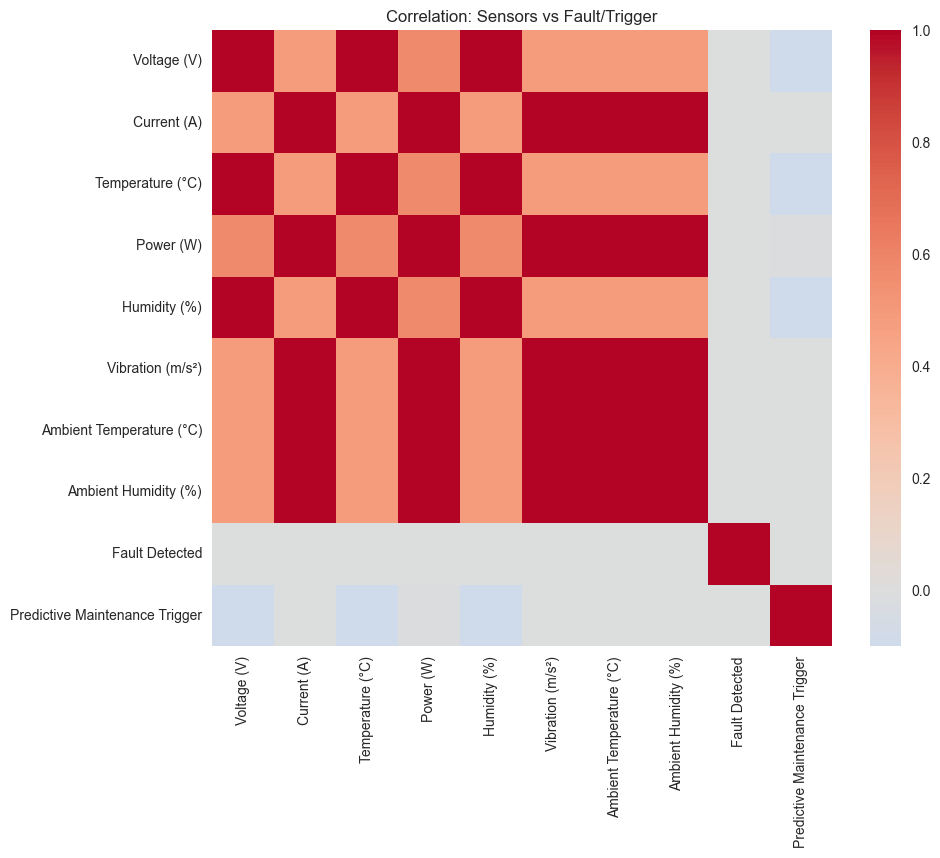

,Fault Detected,Predictive Maintenance Trigger
Fault Detected,1.000000,2.448268e-03
Predictive Maintenance Trigger,0.002448,1.000000e+00
Temperature (°C),0.002215,-1.005038e-01
Humidity (%),0.002215,-1.005038e-01
Voltage (V),0.002215,-1.005038e-01
Power (W),-0.002467,-1.169672e-02
Ambient Temperature (°C),-0.002999,2.193714e-16
Current (A),-0.002999,9.064933e-19
Vibration (m/s²),-0.002999,7.251946e-18
Ambient Humidity (%),-0.002999,2.251729e-16


In [8]:
# 8. Correlation with fault / trigger
corr_cols = sensor_cols + ["Fault Detected", "Predictive Maintenance Trigger"]
corr_df = df[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation: Sensors vs Fault/Trigger")
plt.show()

corr_df[["Fault Detected", "Predictive Maintenance Trigger"]].sort_values(
    by="Fault Detected", ascending=False
)


In [9]:
# 9. Per-equipment time series view
# Pick a few equipment IDs to visualize
sample_equip = df["Equipment_ID"].unique()[:3]
sample_equip


array(['E_1', 'E_10', 'E_11'], dtype=object)

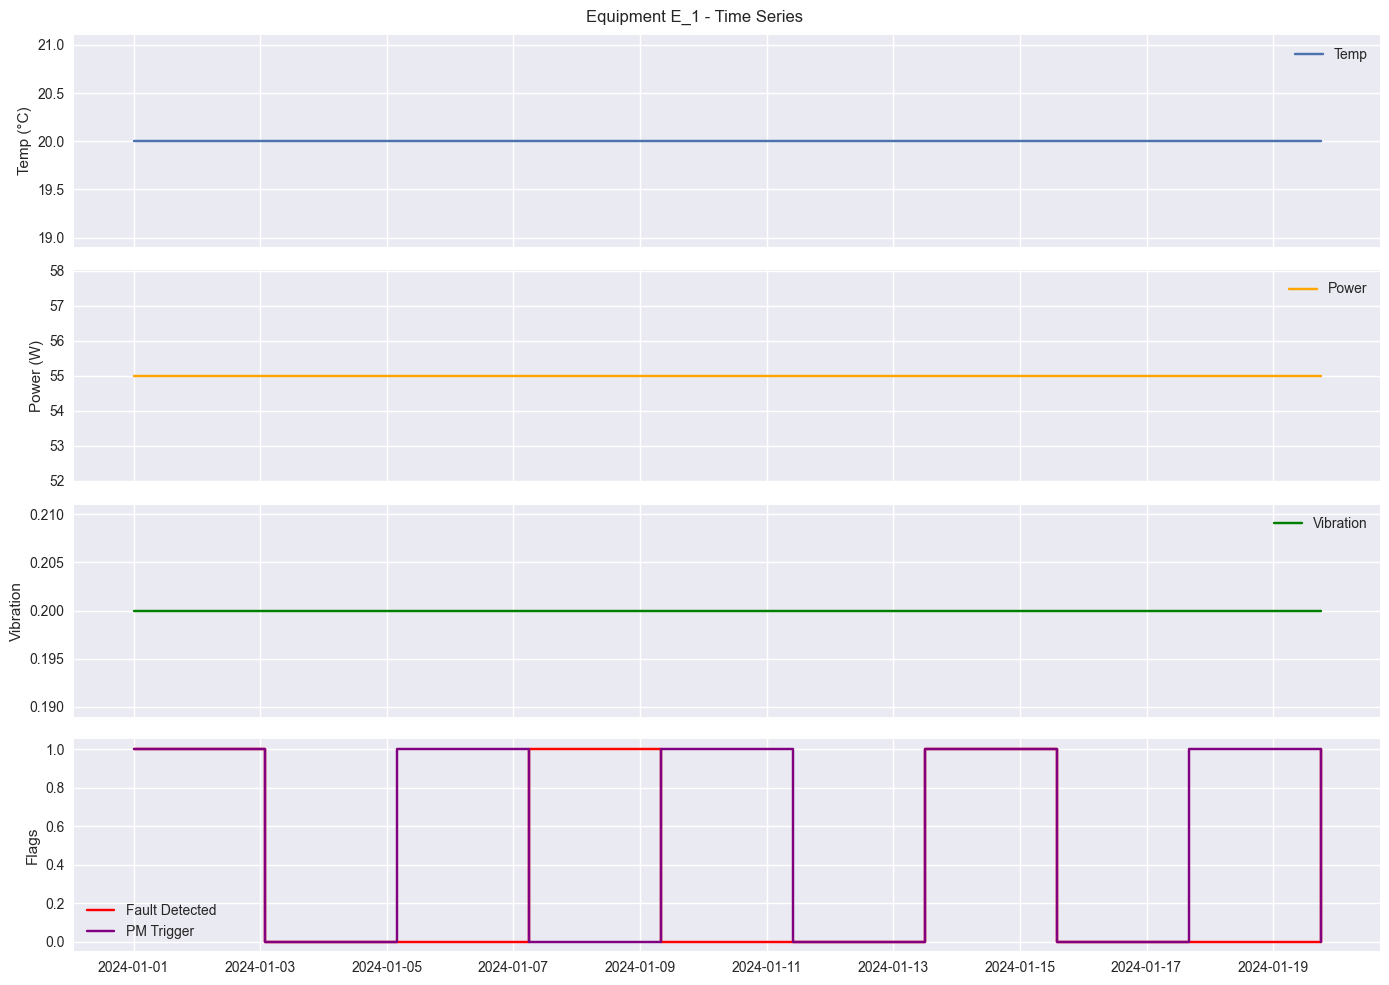

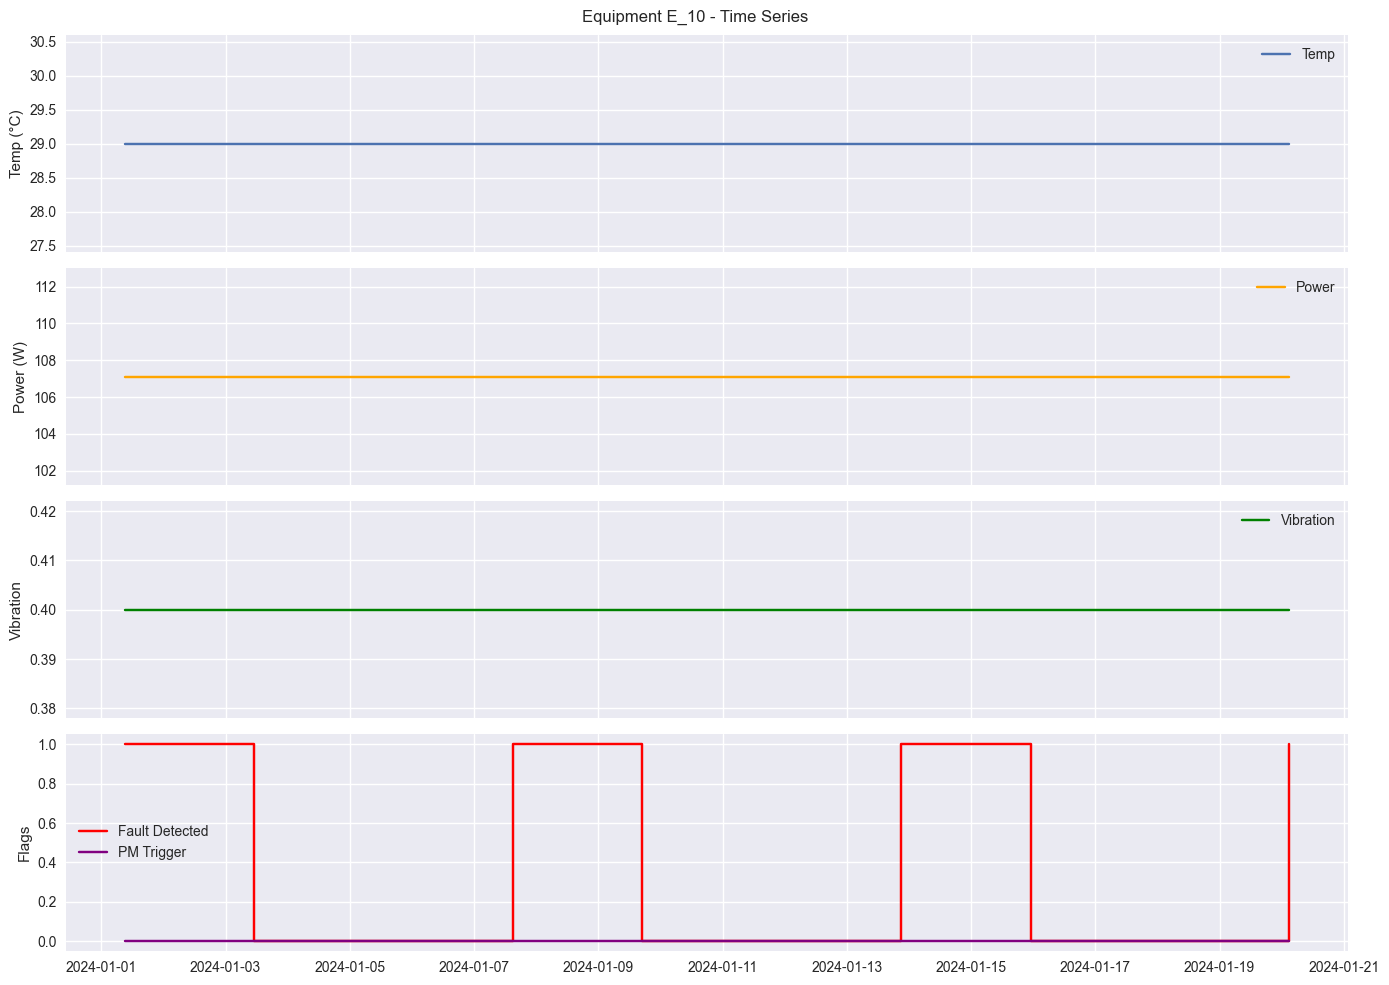

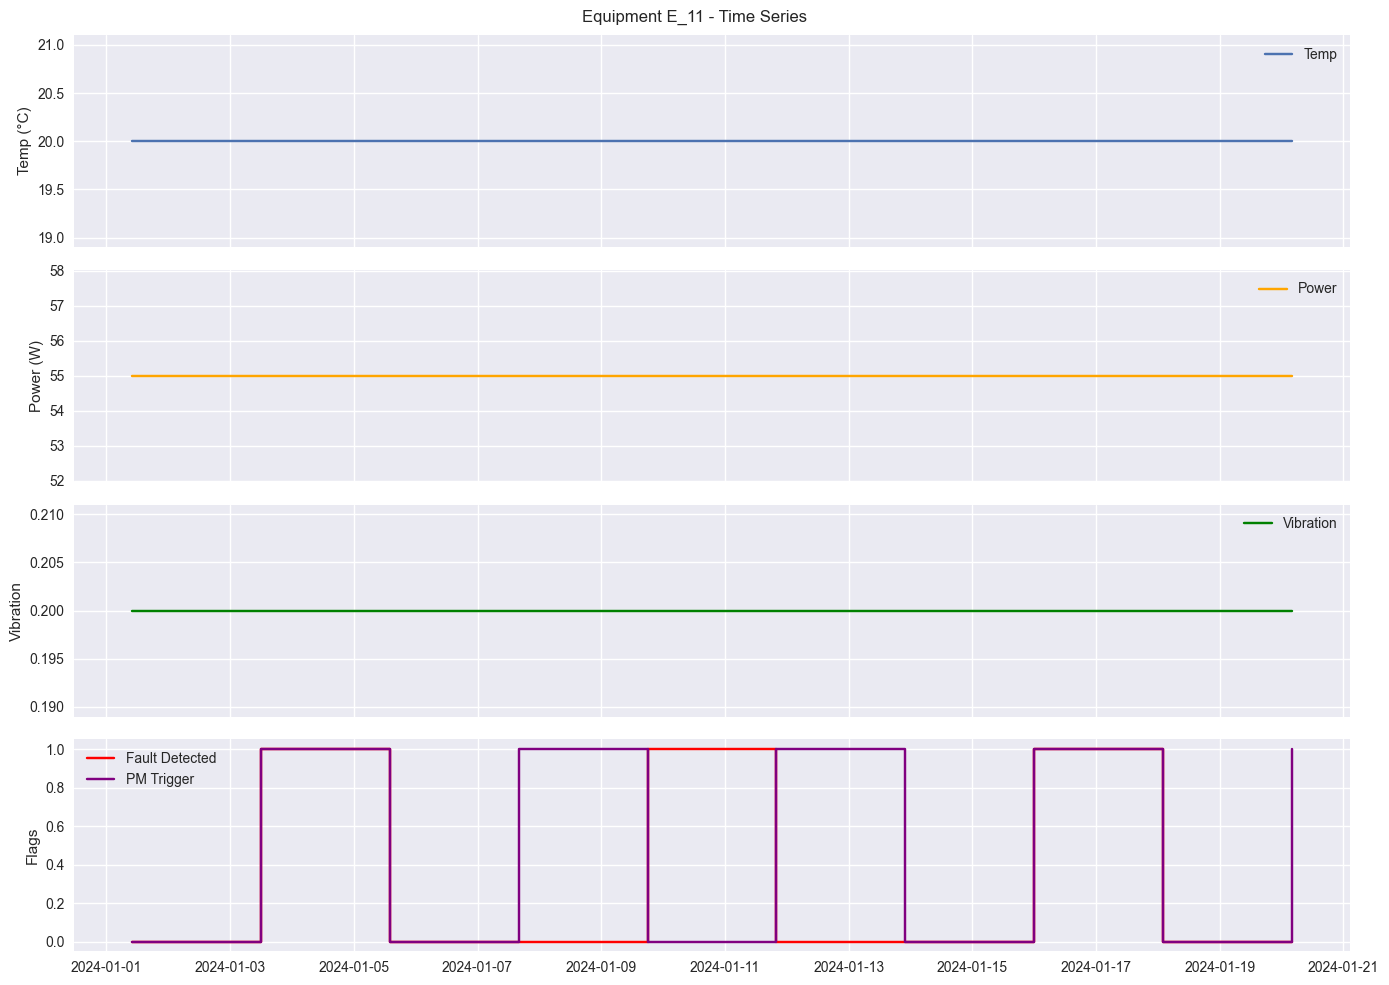

In [10]:
# Helper plot function
def plot_equipment_timeseries(equip_id):
    subset = df[df["Equipment_ID"] == equip_id].copy()

    fig, axes = plt.subplots(4, 1, figsize=(14, 10), sharex=True)
    
    axes[0].plot(subset["Timestamp"], subset["Temperature (°C)"], label="Temp")
    axes[0].set_ylabel("Temp (°C)")
    axes[0].legend()

    axes[1].plot(subset["Timestamp"], subset["Power (W)"], label="Power", color="orange")
    axes[1].set_ylabel("Power (W)")
    axes[1].legend()

    axes[2].plot(subset["Timestamp"], subset["Vibration (m/s²)"], label="Vibration", color="green")
    axes[2].set_ylabel("Vibration")
    axes[2].legend()

    # Fault Detected as step plot
    axes[3].step(subset["Timestamp"], subset["Fault Detected"], where="post",
                 label="Fault Detected", color="red")
    axes[3].step(subset["Timestamp"], subset["Predictive Maintenance Trigger"], where="post",
                 label="PM Trigger", color="purple")
    axes[3].set_ylabel("Flags")
    axes[3].legend()

    plt.suptitle(f"Equipment {equip_id} - Time Series")
    plt.tight_layout()
    plt.show()

for eid in sample_equip:
    plot_equipment_timeseries(eid)


In [11]:
# 10. Failure & maintenance summaries
# Failures by type and criticality
fail_type_counts = df["Failure Type"].value_counts(dropna=False)
crit_vs_fail = pd.crosstab(df["Equipment Criticality"], df["Failure Type"])

fail_type_counts, crit_vs_fail


(Failure Type
 NaN            300
 Overload       125
 Overheating     75
 Name: count, dtype: int64,
 Failure Type           Overheating  Overload
 Equipment Criticality                       
 High                            25       125
 Medium                          50         0)

In [12]:
# Aggregate by equipment
agg = (
    df.groupby("Equipment_ID")
      .agg(
          n_rows=("Sensor_ID", "count"),
          n_faults=("Fault Detected", "sum"),
          n_triggers=("Predictive Maintenance Trigger", "sum"),
          total_repair_time=("Repair Time (hrs)", "sum"),
          total_maintenance_cost=("Maintenance Costs (USD)", "sum"),
          criticality=("Equipment Criticality", "first")
      )
      .reset_index()
)

agg.sort_values("n_faults", ascending=False).head(10)


,Equipment_ID,n_rows,n_faults,n_triggers,total_repair_time,total_maintenance_cost,criticality
0,E_1,10,4,5,20,1500,High
1,E_10,10,4,0,36,2400,Medium
4,E_13,10,4,5,28,1700,High
7,E_16,10,4,0,20,2000,Medium
14,E_22,10,4,0,24,1600,Medium
10,E_19,10,4,5,32,2300,High
17,E_25,10,4,5,36,1900,High
30,E_37,10,4,5,24,2100,High
47,E_7,10,4,5,24,2100,High
43,E_49,10,4,5,32,2300,High


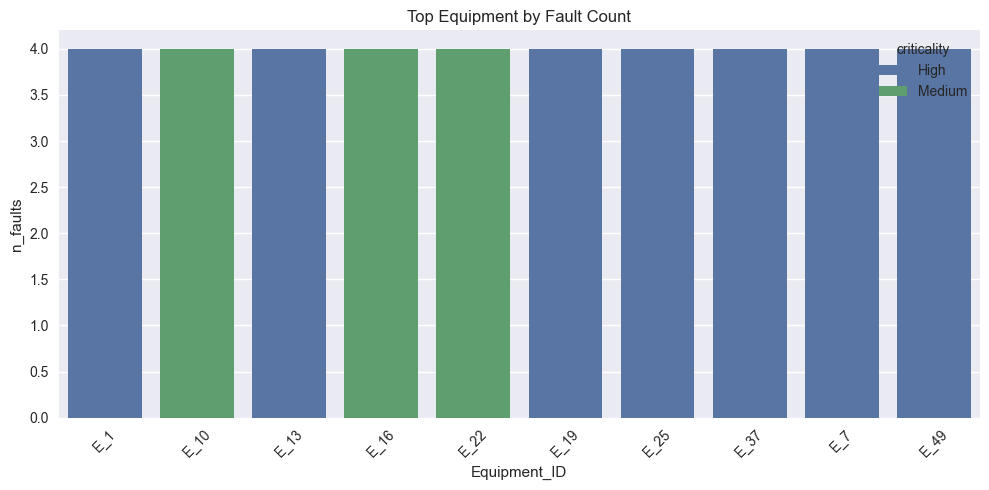

In [13]:
# Plot top equipment by faults
top_faults = agg.sort_values("n_faults", ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_faults, x="Equipment_ID", y="n_faults", hue="criticality")
plt.title("Top Equipment by Fault Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
# 11. Quick textual summary for your report
print("Total rows:", len(df))
print("Time range:", df["Timestamp"].min(), "to", df["Timestamp"].max())
print("Unique equipment:", df["Equipment_ID"].nunique())
print("Total faults:", int(df["Fault Detected"].sum()))
print("Total PM triggers:", int(df["Predictive Maintenance Trigger"].sum()))


Total rows: 500
Time range: 2024-01-01 00:00:00 to 2024-01-21 19:00:00
Unique equipment: 50
Total faults: 167
Total PM triggers: 125


In [15]:
key_sensors = ["Temperature (°C)", "Power (W)", "Current (A)", "Vibration (m/s²)"]
windows = [3, 6, 12, 24]

df = df.sort_values(["Equipment_ID", "Timestamp"])

for col in key_sensors:
    for w in windows:
        roll = df.groupby("Equipment_ID")[col].rolling(window=w, min_periods=1)
        df[f"{col}_mean_{w}h"] = roll.mean().reset_index(level=0, drop=True)
        df[f"{col}_std_{w}h"]  = roll.std().reset_index(level=0, drop=True)
        df[f"{col}_min_{w}h"]  = roll.min().reset_index(level=0, drop=True)
        df[f"{col}_max_{w}h"]  = roll.max().reset_index(level=0, drop=True)
        df[f"{col}_range_{w}h"] = df[f"{col}_max_{w}h"] - df[f"{col}_min_{w}h"]
        df[f"{col}_z_{w}h"] = (
            (df[col] - df[f"{col}_mean_{w}h"]) / df[f"{col}_std_{w}h"]
        )


In [16]:
for col in key_sensors:
    df[f"{col}_diff_1h"] = df.groupby("Equipment_ID")[col].diff(1)
    df[f"{col}_diff_6h"] = df.groupby("Equipment_ID")[col].diff(6)


C:\Users\mihir\AppData\Local\Temp\ipykernel_21960\1226653319.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{col}_diff_1h"] = df.groupby("Equipment_ID")[col].diff(1)
C:\Users\mihir\AppData\Local\Temp\ipykernel_21960\1226653319.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{col}_diff_6h"] = df.groupby("Equipment_ID")[col].diff(6)
C:\Users\mihir\AppData\Local\Temp\ipykernel_21960\1226653319.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

In [17]:
lags = [1, 3, 6, 12]

for col in key_sensors:
    for L in lags:
        df[f"{col}_lag_{L}h"] = df.groupby("Equipment_ID")[col].shift(L)


C:\Users\mihir\AppData\Local\Temp\ipykernel_21960\446859134.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{col}_lag_{L}h"] = df.groupby("Equipment_ID")[col].shift(L)
C:\Users\mihir\AppData\Local\Temp\ipykernel_21960\446859134.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{col}_lag_{L}h"] = df.groupby("Equipment_ID")[col].shift(L)
C:\Users\mihir\AppData\Local\Temp\ipykernel_21960\446859134.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many tim

In [18]:
df["Temp_x_Power"] = df["Temperature (°C)"] * df["Power (W)"]
df["Current_x_Voltage"] = df["Current (A)"] * df["Voltage (V)"]


C:\Users\mihir\AppData\Local\Temp\ipykernel_21960\2248900146.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Temp_x_Power"] = df["Temperature (°C)"] * df["Power (W)"]
C:\Users\mihir\AppData\Local\Temp\ipykernel_21960\2248900146.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Current_x_Voltage"] = df["Current (A)"] * df["Voltage (V)"]


In [19]:
df["Days_since_last_maint"] = (
    df["Timestamp"] - df["Last Maintenance Date"]
).dt.total_seconds() / 86400


C:\Users\mihir\AppData\Local\Temp\ipykernel_21960\3333583382.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Days_since_last_maint"] = (


In [21]:
# 1. Create target: fault in next 6 hours for each equipment
horizon = 6  # hours

df = df.sort_values(["Equipment_ID", "Timestamp"])

# For each Equipment_ID, look ahead horizon rows for a future fault
def make_future_fault_label(x, horizon):
    future = x["Fault Detected"].shift(-horizon)  # fault exactly horizon hours ahead
    # Or use a window: any fault in next horizon hours
    any_future_fault = (
        x["Fault Detected"]
        .rolling(window=horizon, min_periods=1)
        .max()
        .shift(-horizon + 1)
    )
    return any_future_fault

df["fault_next_6h"] = (
    df.groupby("Equipment_ID", group_keys=False)
      .apply(make_future_fault_label, horizon=horizon)
    .fillna(0)
    .astype(int)
)

# Sanity check
df[["Equipment_ID", "Timestamp", "Fault Detected", "fault_next_6h"]].head(10)


C:\Users\mihir\AppData\Local\Temp\ipykernel_21960\703914898.py:20: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(make_future_fault_label, horizon=horizon)


,Equipment_ID,Timestamp,Fault Detected,fault_next_6h
0,E_1,2024-01-01 00:00:00,1,1
1,E_1,2024-01-03 02:00:00,0,1
2,E_1,2024-01-05 04:00:00,0,1
3,E_1,2024-01-07 06:00:00,1,1
4,E_1,2024-01-09 08:00:00,0,1
5,E_1,2024-01-11 10:00:00,0,0
6,E_1,2024-01-13 12:00:00,1,0
7,E_1,2024-01-15 14:00:00,0,0
8,E_1,2024-01-17 16:00:00,0,0
9,E_1,2024-01-19 18:00:00,1,0


In [37]:
id_cols = ["Equipment_ID", "Timestamp"]  # keep Timestamp only as ID, not feature
target_col = "fault_next_6h"

datetime_cols = df.select_dtypes(include=["datetime64[ns]"]).columns.tolist()

feature_cols = [
    c for c in df.columns
    if c not in id_cols
    and c != target_col
    and c not in datetime_cols   # <-- exclude datetimes
    and df[c].dtype != "object"  # numeric only
]

print(len(feature_cols), feature_cols[:10])


139 ['Voltage (V)', 'Current (A)', 'Temperature (°C)', 'Power (W)', 'Humidity (%)', 'Vibration (m/s²)', 'Repair Time (hrs)', 'Maintenance Costs (USD)', 'Ambient Temperature (°C)', 'Ambient Humidity (%)']


In [38]:
print(df.columns.tolist())


['Sensor_ID', 'Timestamp', 'Voltage (V)', 'Current (A)', 'Temperature (°C)', 'Power (W)', 'Humidity (%)', 'Vibration (m/s²)', 'Equipment_ID', 'Operational Status', 'Fault Status', 'Failure Type', 'Last Maintenance Date', 'Maintenance Type', 'Failure History', 'Repair Time (hrs)', 'Maintenance Costs (USD)', 'Ambient Temperature (°C)', 'Ambient Humidity (%)', 'External Factors', 'X', 'Y', 'Z', 'Equipment Relationship', 'Equipment Criticality', 'Fault Detected', 'Predictive Maintenance Trigger', 'time_diff_hr', 'Temperature (°C)_mean_3h', 'Temperature (°C)_std_3h', 'Temperature (°C)_min_3h', 'Temperature (°C)_max_3h', 'Temperature (°C)_range_3h', 'Temperature (°C)_z_3h', 'Temperature (°C)_mean_6h', 'Temperature (°C)_std_6h', 'Temperature (°C)_min_6h', 'Temperature (°C)_max_6h', 'Temperature (°C)_range_6h', 'Temperature (°C)_z_6h', 'Temperature (°C)_mean_12h', 'Temperature (°C)_std_12h', 'Temperature (°C)_min_12h', 'Temperature (°C)_max_12h', 'Temperature (°C)_range_12h', 'Temperature (°C)

In [39]:
model_df[target_col].value_counts(normalize=True)


Series([], Name: proportion, dtype: float64)

In [40]:
print(model_df.shape)
print(model_df.columns[:10])
print(model_df[target_col].value_counts(dropna=False))


(0, 143)
Index(['Equipment_ID', 'Timestamp', 'Voltage (V)', 'Current (A)',
       'Temperature (°C)', 'Power (W)', 'Humidity (%)', 'Vibration (m/s²)',
       'Last Maintenance Date', 'Repair Time (hrs)'],
      dtype='object')
Series([], Name: count, dtype: int64)


In [41]:
tmp = df[id_cols + feature_cols + [target_col]].copy()
tmp = tmp[tmp[target_col].notna()]

X = tmp[feature_cols].fillna(0)
y = tmp[target_col].astype(int)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)



In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1,
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0      1.000     1.000     1.000        50
           1      1.000     1.000     1.000        50

    accuracy                          1.000       100
   macro avg      1.000     1.000     1.000       100
weighted avg      1.000     1.000     1.000       100

[[50  0]
 [ 0 50]]


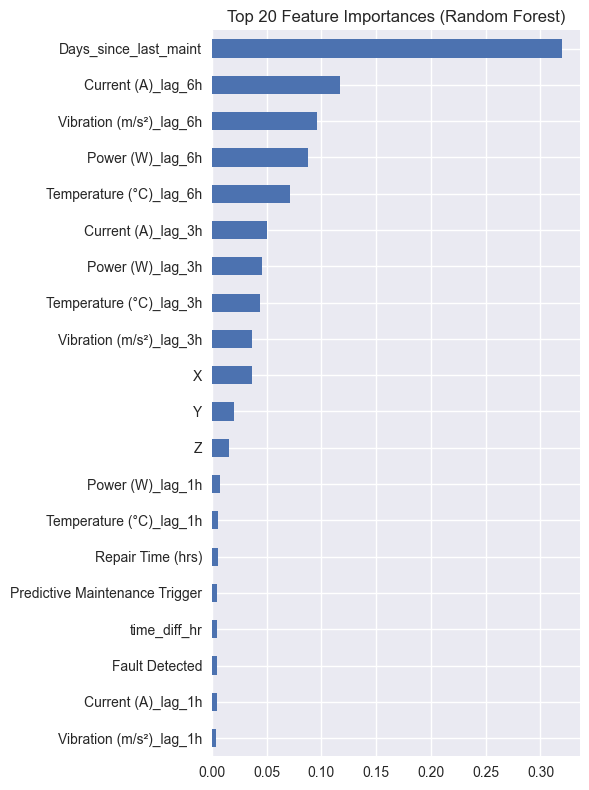

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

fi = pd.Series(rf.feature_importances_, index=feature_cols).sort_values(ascending=False)
fi.head(20).plot(kind="barh", figsize=(6,8))
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


In [44]:
# PHASE 3: MODEL DEVELOPMENT

from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    average_precision_score,
    mean_absolute_error,
    mean_squared_error
)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# X, y should already be defined from Phase 2
# If not:
# tmp = df[id_cols + feature_cols + [target_col]].copy()
# tmp = tmp[tmp[target_col].notna()]
# X = tmp[feature_cols].fillna(0)
# y = tmp[target_col].astype(int)

# Time-ordered split (keep what you had)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [46]:
def eval_classifier(name, clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]

    roc_auc = roc_auc_score(y_test, y_proba)
    pr_auc = average_precision_score(y_test, y_proba)

    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, digits=3))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC-AUC:", round(roc_auc, 3))
    print("PR-AUC:", round(pr_auc, 3))
    return clf


In [47]:
# ============================
# PHASE 3: MODEL DEVELOPMENT
# ============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    average_precision_score,
    mean_absolute_error,
    mean_squared_error,
)

plt.style.use("seaborn-v0_8")

# If needed, rebuild X, y from df
# tmp = df[id_cols + feature_cols + [target_col]].copy()
# tmp = tmp[tmp[target_col].notna()]
# X = tmp[feature_cols].fillna(0)
# y = tmp[target_col].astype(int)

# Time-ordered split (no shuffle)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print(X_train.shape, X_test.shape)
print(y_train.value_counts(), "\n", y_test.value_counts())


(400, 139) (100, 139)
fault_next_6h
1    200
0    200
Name: count, dtype: int64 
 fault_next_6h
1    50
0    50
Name: count, dtype: int64


In [48]:
# ----------------------------
# 1. Helper: classifier eval
# ----------------------------

def eval_classifier(name, clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]

    roc_auc = roc_auc_score(y_test, y_proba)
    pr_auc = average_precision_score(y_test, y_proba)

    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, digits=3))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC-AUC:", round(roc_auc, 3))
    print("PR-AUC:", round(pr_auc, 3))
    return clf, roc_auc, pr_auc


In [49]:
# ----------------------------
# 2. Train three classifiers
# ----------------------------

results = []

# 2a. Random Forest (baseline)
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1,
)
rf, rf_roc, rf_pr = eval_classifier("Random Forest", rf, X_train, y_train, X_test, y_test)
results.append(("Random Forest", rf_roc, rf_pr))

# 2b. Gradient Boosting
gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
)
gb, gb_roc, gb_pr = eval_classifier("Gradient Boosting", gb, X_train, y_train, X_test, y_test)
results.append(("Gradient Boosting", gb_roc, gb_pr))

# 2c. Logistic Regression
log_reg = LogisticRegression(
    penalty="l2",
    C=1.0,
    solver="liblinear",
    class_weight="balanced",
    max_iter=1000,
)
log_reg, lr_roc, lr_pr = eval_classifier("Logistic Regression", log_reg, X_train, y_train, X_test, y_test)
results.append(("Logistic Regression", lr_roc, lr_pr))



=== Random Forest ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        50
           1      1.000     1.000     1.000        50

    accuracy                          1.000       100
   macro avg      1.000     1.000     1.000       100
weighted avg      1.000     1.000     1.000       100

Confusion matrix:
 [[50  0]
 [ 0 50]]
ROC-AUC: 1.0
PR-AUC: 1.0

=== Gradient Boosting ===
              precision    recall  f1-score   support

           0      0.962     1.000     0.980        50
           1      1.000     0.960     0.980        50

    accuracy                          0.980       100
   macro avg      0.981     0.980     0.980       100
weighted avg      0.981     0.980     0.980       100

Confusion matrix:
 [[50  0]
 [ 2 48]]
ROC-AUC: 0.98
PR-AUC: 0.98

=== Logistic Regression ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        50
           1      1.000     1.

In [50]:
# ----------------------------
# 3. Simple model comparison table
# ----------------------------

results_df = pd.DataFrame(results, columns=["Model", "ROC_AUC", "PR_AUC"])
results_df


,Model,ROC_AUC,PR_AUC
0,Random Forest,1.00,1.00
1,Gradient Boosting,0.98,0.98
2,Logistic Regression,1.00,1.00


In [51]:
# ----------------------------
# 4. TimeSeriesSplit cross-validation (F1)
# ----------------------------

tscv = TimeSeriesSplit(n_splits=5)

for name, clf in [
    ("Random Forest", rf),
    ("Gradient Boosting", gb),
    ("Logistic Regression", log_reg),
]:
    scores = cross_val_score(
        clf, X, y, cv=tscv, scoring="f1"
    )
    print(f"{name} TimeSeriesSplit F1:", np.round(scores, 3), "| mean =", scores.mean().round(3))


Random Forest TimeSeriesSplit F1: [0.952 1.    1.    1.    1.   ] | mean = 0.99
Gradient Boosting TimeSeriesSplit F1: [1.    1.    1.    0.975 0.974] | mean = 0.99
Logistic Regression TimeSeriesSplit F1: [0.93 1.   1.   1.   1.  ] | mean = 0.986


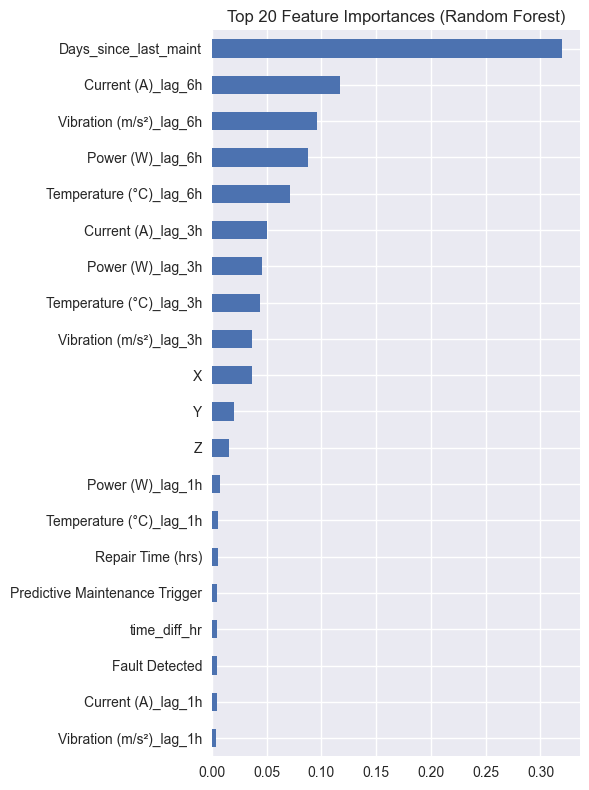

Days_since_last_maint             0.320078
Current (A)_lag_6h                0.116806
Vibration (m/s²)_lag_6h           0.095843
Power (W)_lag_6h                  0.087989
Temperature (°C)_lag_6h           0.071017
Current (A)_lag_3h                0.050639
Power (W)_lag_3h                  0.045734
Temperature (°C)_lag_3h           0.044333
Vibration (m/s²)_lag_3h           0.036622
X                                 0.036327
Y                                 0.020595
Z                                 0.015679
Power (W)_lag_1h                  0.007443
Temperature (°C)_lag_1h           0.005627
Repair Time (hrs)                 0.005301
Predictive Maintenance Trigger    0.004711
time_diff_hr                      0.004563
Fault Detected                    0.004454
Current (A)_lag_1h                0.004365
Vibration (m/s²)_lag_1h           0.003972
dtype: float64

In [52]:
# ----------------------------
# 5. Feature importance (Random Forest)
# ----------------------------

fi = pd.Series(rf.feature_importances_, index=feature_cols).sort_values(ascending=False)

plt.figure(figsize=(6, 8))
fi.head(20).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

fi.head(20)


In [54]:
# ----------------------------
# 6. Approximate RUL and train a regressor
# ----------------------------

df_rul = df.sort_values(["Equipment_ID", "Timestamp"]).copy()

def compute_rul(group):
    times = group["Timestamp"].reset_index(drop=True)
    faults = group["Fault Detected"].reset_index(drop=True).values
    n = len(group)
    rul = np.zeros(n, dtype=float)

    fault_idx = np.where(faults == 1)[0]

    for i in range(n):
        fut_faults = fault_idx[fault_idx > i]
        if len(fut_faults) == 0:
            rul[i] = (times.iloc[-1] - times.iloc[i]).total_seconds() / 3600.0
        else:
            j = fut_faults[0]
            rul[i] = (times.iloc[j] - times.iloc[i]).total_seconds() / 3600.0

    group = group.copy()
    group["RUL_hrs"] = rul
    return group

df_rul = df_rul.groupby("Equipment_ID", group_keys=False).apply(compute_rul)

# Build regression dataset using same features
tmp_reg = df_rul[id_cols + feature_cols + ["RUL_hrs"]].copy()
tmp_reg = tmp_reg[tmp_reg["RUL_hrs"].notna()]

X_reg = tmp_reg[feature_cols].fillna(0)
y_reg = tmp_reg["RUL_hrs"]

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg, y_reg, test_size=0.2, shuffle=False
)

rfr = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1,
)
rfr.fit(Xr_train, yr_train)
yr_pred = rfr.predict(Xr_test)

mae = mean_absolute_error(yr_test, yr_pred)
mse = mean_squared_error(yr_test, yr_pred)  # older sklearn, no 'squared' argument
rmse = np.sqrt(mse)
mape = (np.abs(yr_test - yr_pred) / (yr_test + 1e-6)).mean() * 100

print("RandomForestRegressor MAE:", mae)
print("RandomForestRegressor RMSE:", rmse)
print("RandomForestRegressor MAPE (%):", mape)


C:\Users\mihir\AppData\Local\Temp\ipykernel_21960\4136849626.py:27: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_rul = df_rul.groupby("Equipment_ID", group_keys=False).apply(compute_rul)


RandomForestRegressor MAE: 5.085
RandomForestRegressor RMSE: 12.205019459222505
RandomForestRegressor MAPE (%): 500007.15999988513
